<a href="https://colab.research.google.com/github/gaudhami4/task1/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline
import seaborn as sns
import itertools as it

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
reg = linear_model.LinearRegression()
GT = df[['Ground Temperature']]
CS = df['Chirps/Second']
reg.fit(GT, CS)

LinearRegression()

In [4]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(GT,CS,test_size=1/3,random_state=42)


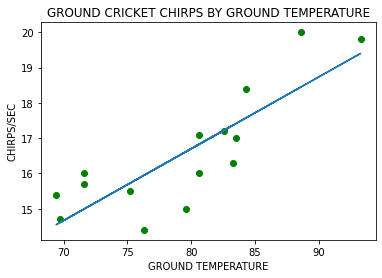

In [6]:
plt.scatter(GT,CS,color='g')
plt.plot(GT,reg.predict(GT))
plt.title('GROUND CRICKET CHIRPS BY GROUND TEMPERATURE')
plt.xlabel('GROUND TEMPERATURE')
plt.ylabel('CHIRPS/SEC')
plt.show()

In [7]:
print('R2 score for the equation:{:.4f}'.format(reg.score(GT,CS)))

R2 score for the equation:0.6923


In [ ]:
#this is not good fit for this data as it is less than 0.8

In [27]:
reg_new = np.arange(95).reshape((-1, 1))
x=reg.predict(reg_new)[-1]
x

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


19.541289397561034

In [29]:
print('At 95˚F, our approximation of chirps/sec is: {:.4f}'
       .format(x))

At 95˚F, our approximation of chirps/sec is: 19.5413


In [30]:
def CS_TEMP(y):
   res=(y-reg.intercept_)/reg.coef_[0]
   print("{} chirps/sec, the ground temp is---->{:.2f} F".format(y,res))

In [31]:
CS_TEMP(18)

18 chirps/sec, the ground temp is---->86.41 F


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [32]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [33]:
reg_b=linear_model.LinearRegression()
body=df[["Body"]]
brain=df[["Brain"]]
reg_b.fit(body,brain)

LinearRegression()

In [34]:
body.shape

(62, 1)

In [35]:
brain.shape

(62, 1)

In [36]:
m=reg_b.coef_[0]
c=reg_b.intercept_
print("y=",m,"* x +",c)

y= [0.90291295] * x + [-56.85554543]


In [ ]:
pred=reg_b.predict(body)
pred

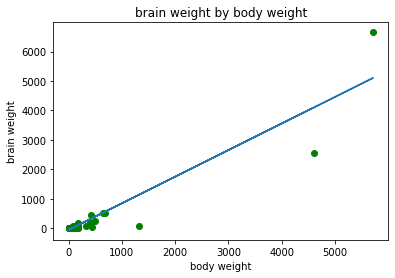

In [39]:
plt.scatter(body,brain,color="g")
plt.plot(body,pred)
plt.title("brain weight by body weight")
plt.xlabel('body weight')
plt.ylabel("brain weight")
plt.show()

In [40]:
print("R^2 score for this equation :{:.4f}".format(reg_b.score(body,brain)))

R^2 score for this equation :0.8727


In [41]:
print("This is greater than 0.8 so it is good fit for the data")

This is greater than 0.8 so it is good fit for the data


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

In [43]:
col=["Sex", "Rank", "Year", "Degree", "YSdeg"]


In [44]:
x = df[col]
y = df.Salary

In [45]:

linreg = linear_model.LinearRegression()
linreg.fit(x, y)



LinearRegression()

In [46]:
print('Features & Coefficients')
print(list(zip(col, linreg.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


# **task 2**

In [47]:
def lin_reg_wrt_focus(col, df, focus='Salary'):
    input_cols = df[col]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [48]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(col, df)))

R^2 score for equation using all columns: 0.8547180674410969


In [49]:
def all_colm(col2):
  return [it.combinations(col2,n+1) for n in range(len(col2))]


In [61]:
combos = all_colm(col)


In [51]:
def scores(combos,df,focus='Salary'):
  score1={}
  for i in range(len(list(combos))):
    for j in list(combos[i]):
      score1[ lin_reg_wrt_focus(list(j),df,focus)]=j
    return score1



In [52]:
score1=scores(combos,df)
sorted(score1.items(),key=lambda c:c[0],reverse=True)

[(0.7525360539274633, ('Rank',)),
 (0.49093702676921624, ('Year',)),
 (0.45542813458360276, ('YSdeg',)),
 (0.06389892583288004, ('Sex',)),
 (0.004861680984748373, ('Degree',))]

# **conclusion**

R^2 score=0.85471806744
year and rank are dominant factor
together they have score 0.8436480

# **task 3**

sex has score close to 0 indicating has no direct influence on salary

In [53]:
num_sex=df.Sex.value_counts()
print("Num men :{} \n num women :{}".format(num_sex[0],num_sex[1]))

Num men :38 
 num women :14


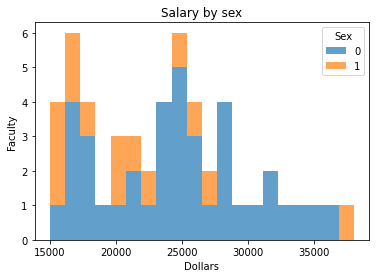

In [54]:
df.pivot_table(index=df.index,columns="Sex",values="Salary")\
           .plot(kind="hist",alpha=0.7,stacked=True,bins=20,title="Salary by sex")
plt.xlabel("Dollars")
plt.ylabel("Faculty")
plt.show()

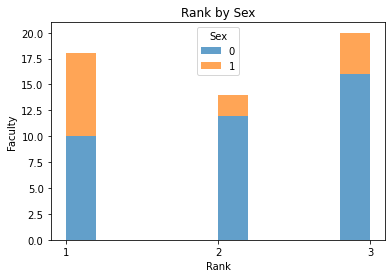

In [55]:
df.pivot_table(index=df.index,columns="Sex",values="Rank")\
        .plot(kind="hist",alpha=0.7,stacked=True,title='Rank by Sex')
plt.xticks([1,2,3])
plt.xlabel("Rank")
plt.ylabel("Faculty")
plt.show()

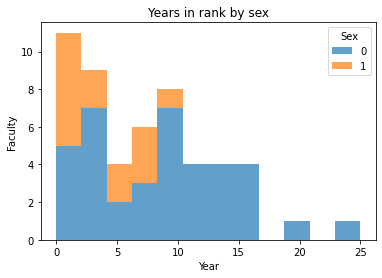

In [56]:
df.pivot_table(index=df.index,columns='Sex',values="Year")\
            .plot(kind="hist",alpha=0.7,stacked=True,bins=12,title="Years in rank by sex")
plt.xlabel("Year")
plt.ylabel("Faculty")
plt.show()

the women at this university have  only been at their present rank for atmost 10 years,lets compare with men with similsr number of years

In [63]:
df_10=df[df["Year"]<=10]


In [66]:
combo_10=all_colm(col)
combo_10_scores=scores(combo_10,df_10)
sorted(combo_10_scores.items(),key=lambda c:c[0],reverse=True)


[(0.7221603677648399, ('Rank',)),
 (0.38329194186217797, ('YSdeg',)),
 (0.32534791979498534, ('Year',)),
 (0.01327225187005543, ('Degree',)),
 (0.006877700561349731, ('Sex',))]

# **task 3**

sex has no direct influence on salary score of 0.00687700561349731

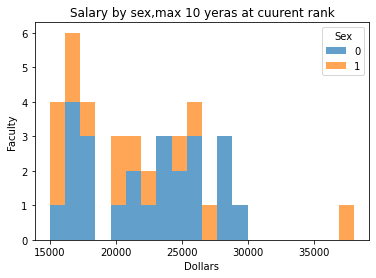

In [70]:
df_10.pivot_table(index=df_10.index,columns='Sex',values='Salary')\
        .plot(kind='hist',alpha=0.7,stacked=True,bins=20,title='Salary by sex,max 10 yeras at cuurent rank')
plt.xlabel("Dollars")
plt.ylabel("Faculty")
plt.show()


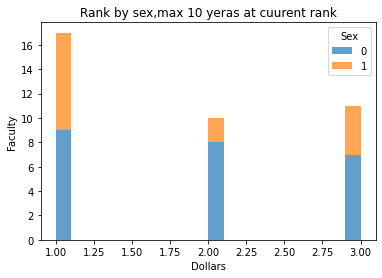

In [71]:
df_10.pivot_table(index=df_10.index,columns='Sex',values='Rank')\
        .plot(kind='hist',alpha=0.7,stacked=True,bins=20,title='Rank by sex,max 10 yeras at cuurent rank')
plt.xlabel("Dollars")
plt.ylabel("Faculty")
plt.show()


In [72]:
rank_discrimination=['Sex','Year','Degree','YSdeg']
combo_rank=all_colm(rank_discrimination)
combo_rank_score=scores(combo_rank,df_10,'Rank')
sorted(combo_rank_score.items(),key=lambda c:c[0],reverse=True)

[(0.48257642674080226, ('YSdeg',)),
 (0.17502353196257248, ('Year',)),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

**salary Discrimination task 3 conclusion**
even looking at the influencer of rank looking only at those who have been at their present rank for 10 yrs or less there is no correlation with sex
**there is no salary discrimination by sex**